In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.base import clone

from sklearn import datasets
from sklearn.linear_model import LogisticRegression


# REGRESSÃO LINEAR

In [2]:
# Normal equation  (𝛉 = (X⊺X)−1 X⊺ y)

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

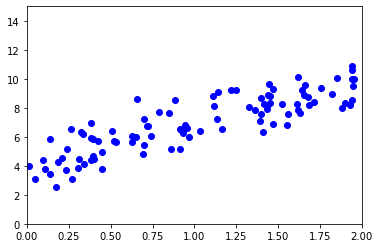

In [3]:
plt.scatter(X, y, c = "blue")
plt.ylim(0, 15)
plt.xlim(0, 2)
plt.show()

In [4]:
X_b = np.c_[np.ones((100, 1)), X] # adiciona X0 para cara observação
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best  # deveria set 4 e 3, mas o ruído torna impossível retornar os vlaores originais

array([[4.06842767],
       [2.84840641]])

In [5]:
# FAZENDO PREDIÇÕES

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.06842767],
       [9.76524049]])

In [6]:
X_new_b

array([[1., 0.],
       [1., 2.]])

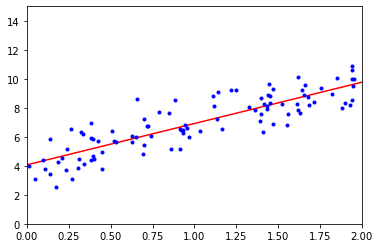

In [7]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [8]:
# USANDO SCIKIT-LEARN

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[4.06842767] [[2.84840641]]
[[4.06842767]
 [9.76524049]]


In [9]:
# BATCH GRADIENT DESCENT  

eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # vetor de gradiente da função custo
    theta = theta - eta * gradients # theta do próximo passo
    
theta

array([[4.06842767],
       [2.84840641]])

In [10]:
# GRADIENTE DESCENDENTE ESTOCÁSTICO

n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
print(theta, "\n")


# USANDO SCIKIT-LEARN
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
print(sgd_reg.intercept_, sgd_reg.coef_)

[[4.04505864]
 [2.86423383]] 

[4.03966182] [2.89482745]


# REGRESSÃO POLINOMIAL

In [11]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

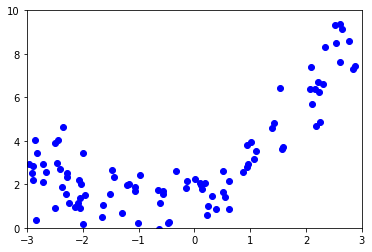

In [12]:
plt.scatter(X, y, c = "blue")
plt.axis([-3,3,0,10])
plt.show()

In [13]:
# ADICIONA TERMO QUADRÁTICO DE CADA VARIÁVEL

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)
print(X[0], "\n")
print(X_poly[0])

[-2.291144] 

[-2.291144    5.24934082]


In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.53417609]), array([[1.0636953 , 0.55056875]]))

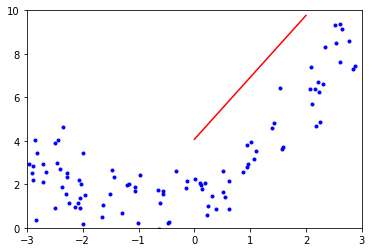

In [15]:
#PROBLEMA PARA PLOTAR - REVER CÓDIGO DE PREDIÇÕES (y_predict) QUE FOI APAGADO

plt.plot(X_new[:,0], y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([-3, 3, 0, 10])
plt.show()

# LEARNING CURVES

In [17]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):        
        model.fit(X_train[:m], y_train[:m]) # treina modelo a cada iteração e faz CV em todas as observações
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

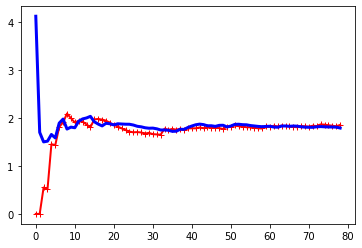

In [18]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

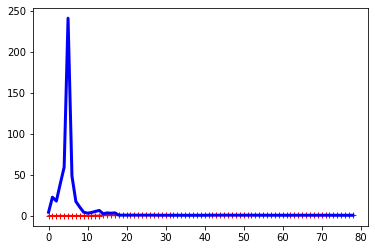

In [23]:
polynomial_regression = Pipeline([
("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)

In [27]:
# HIPERPARÂMETRO DE REGULARIZAÇÃO

# REGRESSÃO RIDGE

ridge_reg = Ridge(alpha=1, solver="cholesky")

ridge_reg.fit(X, y)

ridge_reg.predict([[1.5]])

In [28]:
# GRADIENTE DESCENDENTE

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.75238279])

In [30]:
# LASSO

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.73151362])

In [32]:
# ELASTIC NET 

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.73392795])

In [ ]:
#### EARLY STOPPING ####

# Escolhe o ponto de menor erro da curva de teste

poly_scaler = Pipeline([
                ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
                ("std_scaler", StandardScaler())
                ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [42]:
# LIMITES DE DECISÃO

iris = datasets.load_iris()
list(iris.keys())

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             tol=-inf, warm_start=True)

In [47]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(int) # 1 se Iris virginica, 0 do contrário

In [49]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

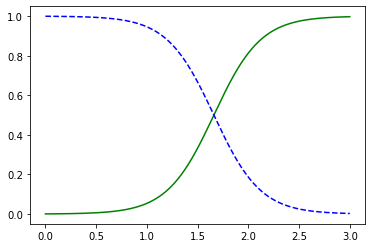

In [50]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

In [59]:
# SOFTMAX REGRESSION

# Generalização de Regressão Logística para múltiplas classes sem ter de criar e combinar
# múltiplocs classificadores binários